In [7]:
%pylab inline
from PIL import Image
import glob
from scipy.io import savemat, loadmat
from IPython.display import display, clear_output
import pandas as pd
import numpy as np
import random

Populating the interactive namespace from numpy and matplotlib


c:\python368-64\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


A function to save images and its labels as numpy array to reduce cost of reading data, by converting to grayscale and resizing.

In [10]:
def save_objects_and_labels():
    path = "C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\Individual_Objects\\*.png"
    objects = []
    labels  = []
    paths = glob.glob(path)
    random.shuffle(paths)
    for p in paths:
        clear_output(wait=True)
        img = np.array(Image.open(p).convert('L')) / 255
        img = img.resize((135, 135), Image.NEAREST) #OverflowError when 270x270: Python int too large to convert to C long
        objects.append(img.flatten())
        labels.append(int(p[-5])) # Get lable string at the end before '.png' extension
        display(str(len(objects)) + " / " + str(len(paths)))

    savemat('Individual_Objects_135x135.mat', {'objects': np.array(objects)})
    savemat('Individual_Objects_135x135_labels.mat', {'labels': np.array(labels)})

In [11]:
#save_objects_and_labels()

'5788 / 5788'

In [15]:
objects = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\Individual_Objects_135x135.mat")
objects = objects["objects"]
labels = loadmat("C:\\Users\\ustundag\\GitHub\\2D-3D-Semantics\\Individual_Objects_135x135_labels.mat")
labels = labels["labels"]

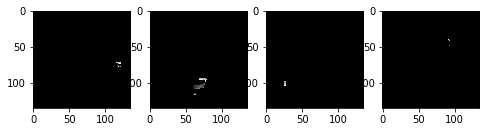

In [12]:
pylab.figure(figsize=(8, 8))
for i in range(4):
    pylab.subplot(1, 4, i + 1)
    pylab.imshow(objects[i].reshape([135, 135]), cmap='gray')

In [13]:
set(labels[0])

NameError: name 'labels' is not defined